<a href="https://colab.research.google.com/github/Yatharth31/DL-LAB/blob/main/Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement Convolutional Neural Network on Fashion MNIST Dataset


In [1]:
import tensorflow as tp
from keras.datasets import fashion_mnist

In [2]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

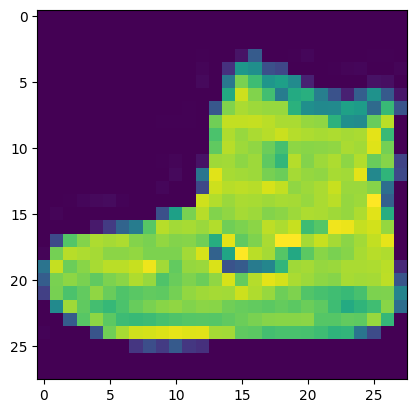

In [5]:
plt.imshow(x_train[0])
print(x_train[0])

In [6]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


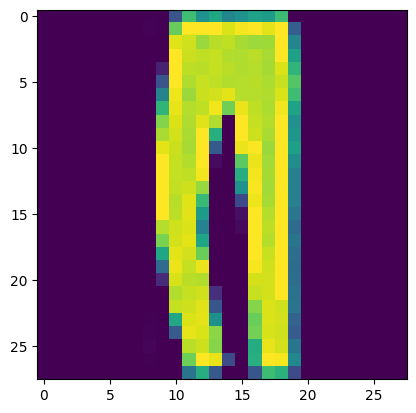

In [54]:
plt.imshow(x_test[2])

In [53]:
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
print(y_train[5],y_train_encoded[5])
print(y_test[2],y_test_encoded[2])

2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
print("y_train encoded shape ", y_train_encoded.shape)
print("y_test encoded shape ", y_test_encoded.shape)

y_train encoded shape  (60000, 10)
y_test encoded shape  (10000, 10)


#Preprocessing

In [9]:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)

(60000, 784)
(10000, 784)


In [10]:
# display pixel value
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 4, 6, 7, 10, 12, 13, 15, 18, 23, 29, 35, 36, 40, 41, 44, 48, 52, 54, 55, 56, 57, 58, 61, 62, 64, 65, 66, 67, 69, 72, 73, 74, 75, 77, 80, 82, 88, 92, 98, 99, 102, 106, 107, 109, 115, 117, 119, 121, 122, 123, 127, 130, 134, 136, 141, 144, 145, 146, 150, 154, 155, 156, 159, 161, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 248, 249, 250, 255}


In [11]:
# Data normalization
import math
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
epsilon = pow(math.e,-10)


In [12]:
x_train_norm=(x_train_reshaped-x_mean)/(x_std+epsilon)
x_test_norm=(x_test_reshaped-x_mean)/(x_std+epsilon)

#CNN MODEL

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2D, MaxPooling2D, Flatten

In [27]:
model = Sequential()
model.add(Reshape((28,28,1), input_shape=(784,)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [29]:
#compiling model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
#Training the model
model.fit(x_train_norm , y_train_encoded,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2862 - accuracy: 0.8982
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2666 - accuracy: 0.9048
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2502 - accuracy: 0.9100
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2362 - accuracy: 0.9153
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2242 - accuracy: 0.9189


In [30]:
#Evaluating the model
loss,accuracy=model.evaluate(x_test_norm,y_test_encoded)
print('Testset Accuracy=',accuracy*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.2628 - accuracy: 0.9039
Testset Accuracy= 90.39000272750854


In [56]:
pred = model.predict([x_test_norm])
pred[2]

313/313 [==============================] - 1s 2ms/step


array([6.2181216e-06, 9.9998295e-01, 3.3685588e-08, 5.2675518e-06,
       5.0827739e-06, 9.2235952e-09, 1.0860970e-07, 3.5146794e-08,
       3.4582879e-07, 6.4091147e-08], dtype=float32)

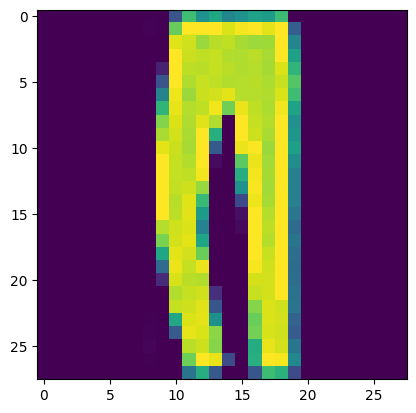

In [55]:
plt.imshow(x_test[2])